# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

## 1: Plot number of people by gender

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [4]:
df.shape

(2535, 14)

In [5]:
gender_count = df.gender.value_counts()
gender_count

M    2428
F     107
Name: gender, dtype: int64

In [6]:
for i, ii in enumerate(gender_count):
    print(i)
    

0
1


In [7]:
for i, ii in enumerate(gender_count):
    print(ii)

2428
107


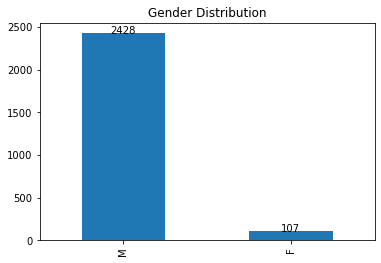

In [8]:
#1 with pandas

gender_count.plot(kind="bar")
for i, ii in enumerate(gender_count):
    plt.text(i, ii, str(ii), ha="center")
plt.title("Gender Distribution");


In [9]:
df.gender.value_counts().values

array([2428,  107], dtype=int64)

In [10]:
df.gender.value_counts().index

Index(['M', 'F'], dtype='object')

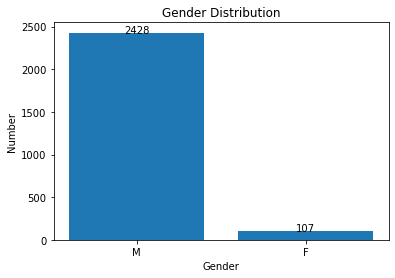

In [11]:
# with matplotlib
x = gender_count.index
y = gender_count.values


plt.bar(x, y)
plt.xlabel("Gender")
plt.ylabel("Number")
plt.title("Gender Distribution")
for index, value in enumerate(y): 
    plt.text(index, value, str(value), ha="center");

## 2: Plot 7 most common kill weapons

In [12]:
#1

df.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [13]:
#2

df.armed.value_counts()[:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [14]:
kill_weapons = df.armed.value_counts().head(7)

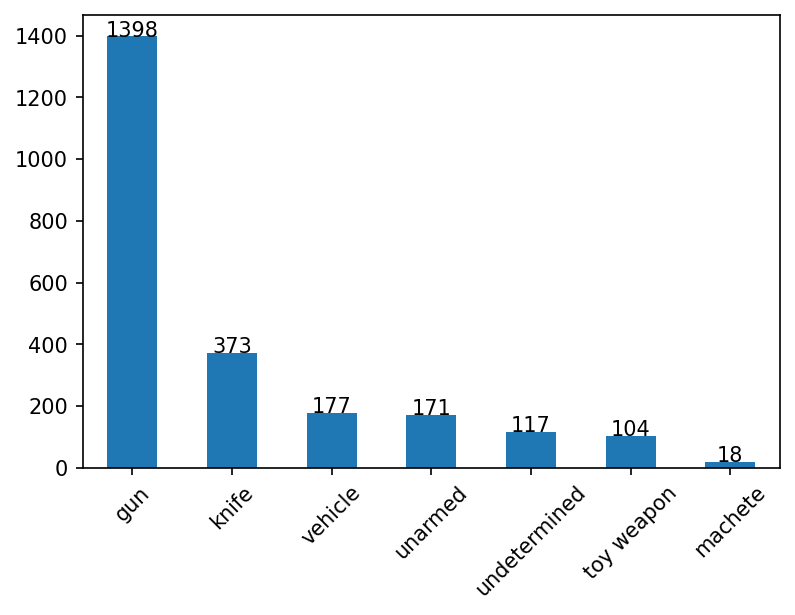

In [15]:
#1 with pandas


plt.figure(figsize=(6,4),dpi = 150)
kill_weapons.plot(kind="bar")
for i, ii in enumerate(kill_weapons):
    plt.text(i, ii, str(ii), ha="center")
    plt.xticks(rotation=45);

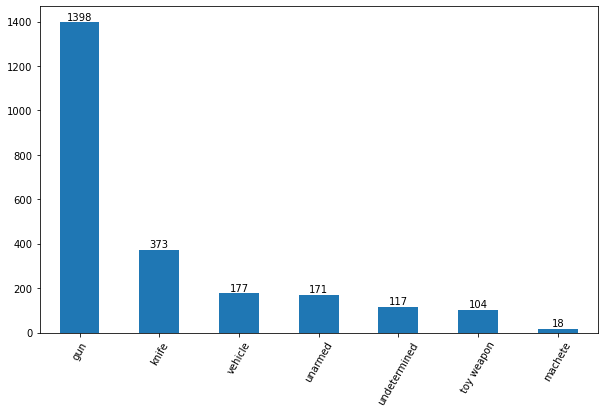

In [16]:
#2 with pandas

x = kill_weapons[:7].index
y = kill_weapons[:7].values

plt.figure(figsize=(10, 6))
kill_weapons[:7].plot.bar()
plt.xticks(rotation = 60);

for index, value in enumerate(y):
    plt.text(index,value,str(value),ha = 'center',va = "bottom")


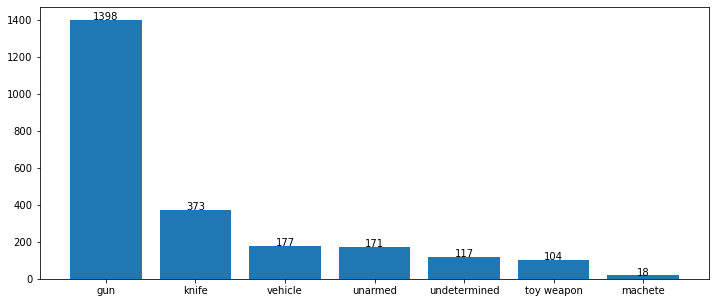

In [17]:
#1 with matplotlib


plt.figure(figsize=(12, 5))
plt.bar(x, y)
for index, value in enumerate(y): 
    plt.text(index, value, str(value), ha="center");

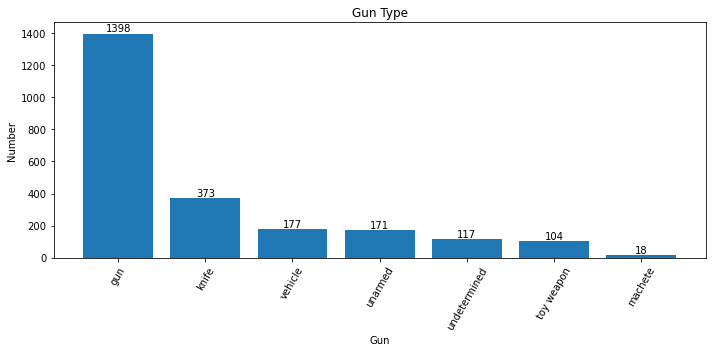

In [18]:
#2 with matplotlip


fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel("Gun")
ax.set_ylabel('Number')
ax.set_title('Gun Type')
ax.bar(x,y)
plt.xticks(rotation = 60)
fig.tight_layout()
for index, value in enumerate(y):
    plt.text(index,value, str(value), ha = 'center', va= "bottom")

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [19]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [20]:
df.shape

(2535, 14)

In [21]:
df.age.isnull().sum()

77

In [22]:
over_25 = df.age.dropna() > 25

In [23]:
over_25

0        True
1        True
2       False
3        True
4        True
        ...  
2529     True
2530     True
2532     True
2533     True
2534     True
Name: age, Length: 2458, dtype: bool

In [24]:
over_25 = over_25.replace({True:"Over 25", False:"Under 25"})

In [25]:
over_25

0        Over 25
1        Over 25
2       Under 25
3        Over 25
4        Over 25
          ...   
2529     Over 25
2530     Over 25
2532     Over 25
2533     Over 25
2534     Over 25
Name: age, Length: 2458, dtype: object

In [26]:
over_25.value_counts()

Over 25     1905
Under 25     553
Name: age, dtype: int64

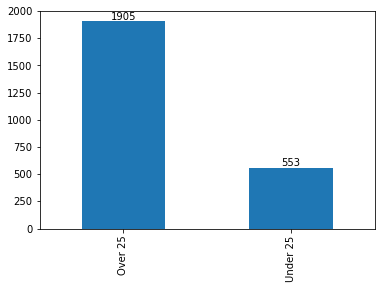

In [28]:
# with pandas


over_25.value_counts().plot(kind="bar")
for i, ii in enumerate(over_25.value_counts()):
    plt.text(i, ii, str(ii), ha = 'center', va= "bottom");

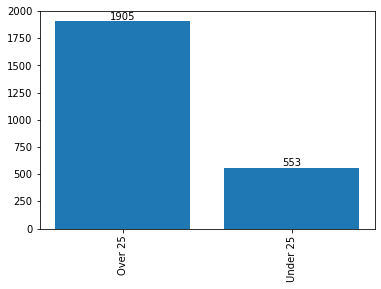

In [29]:
# with matplotlib


x = over_25.value_counts().index
y = over_25.value_counts().values

plt.bar(x, y)
plt.xticks(rotation = 90)
for i, ii in enumerate(over_25.value_counts()):
    plt.text(i, ii, str(ii), ha="center", va="bottom");

## 4: Plot number of killed poeple by race

In [30]:
kill_by_race = df.race.value_counts()
kill_by_race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

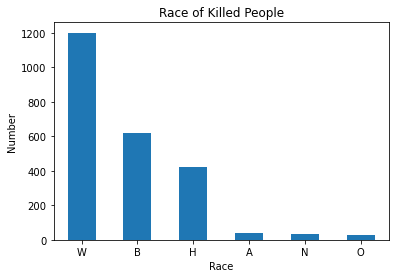

In [31]:
# with pandas


kill_by_race.plot(kind="bar")
plt.title("Race of Killed People")
plt.xlabel("Race")
plt.ylabel("Number")
plt.xticks(rotation = 360);

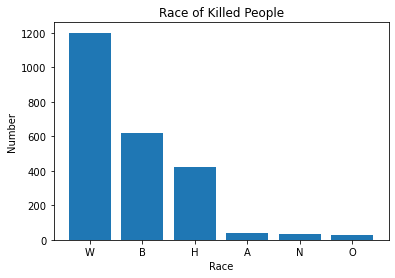

In [32]:
# with matplotlib


x = kill_by_race.index
y = kill_by_race.values

plt.bar(x, y)
plt.title("Race of Killed People")
plt.xlabel("Race")
plt.ylabel("Number");

## 5: Killed People According to Races (Pie Chart)

In [33]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [34]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [35]:
kill_by_race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [36]:
df.race.shape

(2535,)

In [37]:
df.dropna(inplace=True)

In [38]:
df.race.shape

(2254,)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [39]:
df.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [40]:
df.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [41]:
df.race.value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

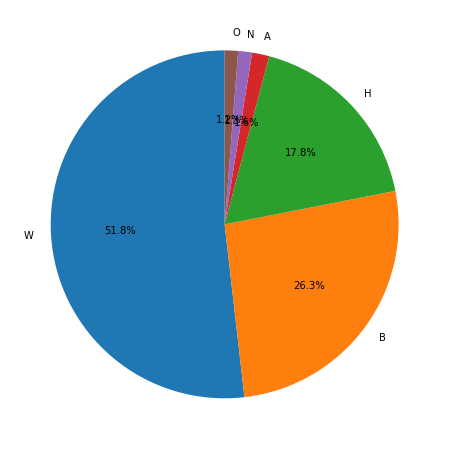

In [42]:
#1 matplotlib


x = df.race.value_counts().index
y = df.race.value_counts().values 

plt.figure(figsize=(12, 8))
plt.pie(y, labels=(df.race.value_counts().index), autopct='%1.1f%%', startangle=90);

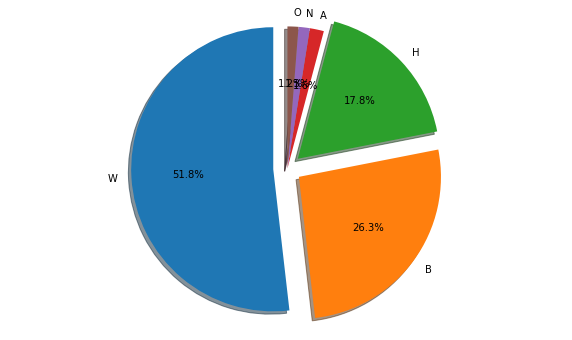

In [43]:
#2 matplotlib


#plt.pie(df.race.value_counts(),labels = df.race.value_counts().index, autopct='%1.1f%%',explode = explode);
#explode = (0, 0, 0.2, 0, 0, 0)

labels = df.race.value_counts().index
sizes = df.race.value_counts()
explode = (0.1, 0.1, 0.1, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

## 6: Most common 15 Name or Surname of killed people 

In [44]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [45]:
df.shape

(2254, 14)

In [46]:
df.name.value_counts()

Eric Harris                 2
Brandon Jones               2
Michael Brown               2
Michael Johnson             2
Daquan Antonio Westbrook    2
                           ..
Quincy Reed Reindl          1
John Alan Britton           1
Shannon Edward Estill       1
Allen Pacheco               1
Chris Ingram                1
Name: name, Length: 2249, dtype: int64

In [47]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


pairs = df.name[df.name != "TK TK"].str.split()
pairs.head()


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [48]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

In [49]:
pairs.shape

(2253,)

In [50]:
pairs[0]

['Tim', 'Elliot']

In [51]:
pairs[0][0]

'Tim'

5339

In [52]:
#1


long_list = []
for i in pairs:
    for ii in i:
        long_list.append(ii)
long_list

['Tim',
 'Elliot',
 'Lewis',
 'Lee',
 'Lembke',
 'John',
 'Paul',
 'Quintero',
 'Matthew',
 'Hoffman',
 'Michael',
 'Rodriguez',
 'Kenneth',
 'Joe',
 'Brown',
 'Kenneth',
 'Arnold',
 'Buck',
 'Brock',
 'Nichols',
 'Autumn',
 'Steele',
 'Leslie',
 'Sapp',
 'III',
 'Patrick',
 'Wetter',
 'Ron',
 'Sneed',
 'Hashim',
 'Hanif',
 'Ibn',
 'Abdul-Rasheed',
 'Nicholas',
 'Ryan',
 'Brickman',
 'Omarr',
 'Julian',
 'Maximillian',
 'Jackson',
 'Loren',
 'Simpson',
 'James',
 'Dudley',
 'Barker',
 'Artago',
 'Damon',
 'Howard',
 'Thomas',
 'Hamby',
 'Jimmy',
 'Foreman',
 'Andy',
 'Martinez',
 'Tommy',
 'Smith',
 'Brian',
 'Barbosa',
 'Salvador',
 'Figueroa',
 'John',
 'Edward',
 "O'Keefe",
 'Richard',
 'McClendon',
 'Marcus',
 'Golden',
 'Michael',
 'Goebel',
 'Mario',
 'Jordan',
 'Talbot',
 'Schroeder',
 'Robert',
 'Edwards',
 'Jeffrey',
 'R.',
 'Nielson',
 'Donte',
 'Sowell',
 'Kavonda',
 'Earl',
 'Payton',
 'Quincy',
 'Reed',
 'Reindl',
 'Jose',
 'Ceja',
 'Nathan',
 'Massey',
 'Scott',
 'Hall',


In [53]:
#2


name_surname_list = [ii for i in pairs for ii in i]

In [54]:
name_surname_list

['Tim',
 'Elliot',
 'Lewis',
 'Lee',
 'Lembke',
 'John',
 'Paul',
 'Quintero',
 'Matthew',
 'Hoffman',
 'Michael',
 'Rodriguez',
 'Kenneth',
 'Joe',
 'Brown',
 'Kenneth',
 'Arnold',
 'Buck',
 'Brock',
 'Nichols',
 'Autumn',
 'Steele',
 'Leslie',
 'Sapp',
 'III',
 'Patrick',
 'Wetter',
 'Ron',
 'Sneed',
 'Hashim',
 'Hanif',
 'Ibn',
 'Abdul-Rasheed',
 'Nicholas',
 'Ryan',
 'Brickman',
 'Omarr',
 'Julian',
 'Maximillian',
 'Jackson',
 'Loren',
 'Simpson',
 'James',
 'Dudley',
 'Barker',
 'Artago',
 'Damon',
 'Howard',
 'Thomas',
 'Hamby',
 'Jimmy',
 'Foreman',
 'Andy',
 'Martinez',
 'Tommy',
 'Smith',
 'Brian',
 'Barbosa',
 'Salvador',
 'Figueroa',
 'John',
 'Edward',
 "O'Keefe",
 'Richard',
 'McClendon',
 'Marcus',
 'Golden',
 'Michael',
 'Goebel',
 'Mario',
 'Jordan',
 'Talbot',
 'Schroeder',
 'Robert',
 'Edwards',
 'Jeffrey',
 'R.',
 'Nielson',
 'Donte',
 'Sowell',
 'Kavonda',
 'Earl',
 'Payton',
 'Quincy',
 'Reed',
 'Reindl',
 'Jose',
 'Ceja',
 'Nathan',
 'Massey',
 'Scott',
 'Hall',


In [55]:
Counter = {i:name_surname_list.count(i) for i in set(name_surname_list)}

In [144]:
Counter

{'Amaya': 1,
 'Casey': 3,
 'Glen': 2,
 'Usaamah': 1,
 'Keil': 1,
 'Maine': 1,
 'Patrick': 13,
 'Kuik': 1,
 'Selis': 1,
 'Aubrey': 1,
 'Bosell': 1,
 'Ballard': 2,
 'Ceja': 1,
 'Stokes': 1,
 'Hashim': 1,
 'Gordon': 2,
 'Thevenin': 1,
 'Sandor': 1,
 'Eduardo': 3,
 'Shipley': 1,
 'Tyrone': 5,
 'Kassick': 1,
 'Pream': 1,
 'DiTullio': 1,
 'Alijah': 1,
 'Roy': 6,
 'Doyle': 1,
 'Simon': 2,
 'Chance': 3,
 'Castle': 1,
 'Tellez': 1,
 'Yia': 1,
 'Ponce-Galon': 1,
 'Bryon': 1,
 'Luke': 3,
 'Warren': 1,
 'Tuseth': 1,
 'DePetris': 1,
 'Webster': 1,
 'Ryerson': 1,
 'Christopher': 35,
 'Gossman': 1,
 'Hanif': 1,
 'Deysie': 1,
 'Matautu': 1,
 'Carl': 4,
 'Justine': 1,
 'Brenda': 1,
 'Klimek': 1,
 'Alfred': 4,
 'Shalamar': 1,
 'Blood': 1,
 'Harvey': 1,
 'Solis': 1,
 'Eddie': 4,
 'Leon': 4,
 'Irwin': 1,
 'Bigley': 1,
 'Godines': 1,
 'Hess': 2,
 'Thompkins': 1,
 'Dexter': 2,
 'Abdul': 1,
 'Navas': 1,
 'Redding': 1,
 'Limon': 1,
 'Keckhafer': 1,
 'Vanderburgh': 1,
 'Mathis': 2,
 'Whitney': 1,
 'Kawanza': 1

In [56]:
most_common_names_surnames = pd.Series(Counter).sort_values(ascending=False)[:15]
most_common_names_surnames

Michael        82
David          53
James          47
Robert         44
Joseph         43
Daniel         40
William        40
Lee            37
John           36
Christopher    35
Richard        33
Smith          31
J.             30
Johnson        29
Joshua         27
dtype: int64

In [57]:
most_common_names_surnames.values

array([82, 53, 47, 44, 43, 40, 40, 37, 36, 35, 33, 31, 30, 29, 27],
      dtype=int64)

In [58]:
most_common_names_surnames.index

Index(['Michael', 'David', 'James', 'Robert', 'Joseph', 'Daniel', 'William',
       'Lee', 'John', 'Christopher', 'Richard', 'Smith', 'J.', 'Johnson',
       'Joshua'],
      dtype='object')

In [59]:
type(most_common_names_surnames)

pandas.core.series.Series

In [60]:
common_names = pd.DataFrame(most_common_names_surnames)
common_names


,0
Michael,82
David,53
James,47
Robert,44
Joseph,43
Daniel,40
William,40
Lee,37
John,36
Christopher,35


In [61]:
common_names.rename(columns ={0:'frequency'},inplace=True)
common_names

,frequency
Michael,82
David,53
James,47
Robert,44
Joseph,43
Daniel,40
William,40
Lee,37
John,36
Christopher,35


In [72]:
common_names.reset_index(inplace=True)
common_names

,most_common_names_of_killed_people,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


In [73]:
common_names.rename(columns ={"index":'most_common_names_of_killed_people'},inplace=True)
common_names.set_index("most_common_names_of_killed_people", inplace=True)
common_names

,frequency
most_common_names_of_killed_people,
Michael,82
David,53
James,47
Robert,44
Joseph,43
Daniel,40
William,40
Lee,37
John,36


<Figure size 864x576 with 0 Axes>

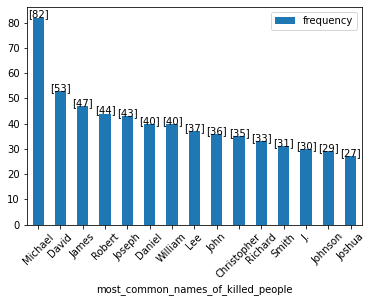

In [74]:
plt.figure(figsize=(12, 8))
common_names.plot(kind="bar")
for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 45);

In [76]:
common_names.index

Index(['Michael', 'David', 'James', 'Robert', 'Joseph', 'Daniel', 'William',
       'Lee', 'John', 'Christopher', 'Richard', 'Smith', 'J.', 'Johnson',
       'Joshua'],
      dtype='object', name='most_common_names_of_killed_people')

In [77]:
common_names.values

array([[82],
       [53],
       [47],
       [44],
       [43],
       [40],
       [40],
       [37],
       [36],
       [35],
       [33],
       [31],
       [30],
       [29],
       [27]], dtype=int64)

In [81]:
# with matplotlib


plt.figure(figsize=(12,6), dpi = 200)
plt.bar(common_names.index, common_names.values);

for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 45);

plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')